In [4]:
from worm.helpers.sim import WormInputParameters, WormSimulation
import numpy as np
from pathlib import Path

L = 16
mu = np.zeros((L, L))
mu[3:10,3:10] = 1

muU = 1.1
U_on = np.full(shape=(L,L),fill_value= 4 / 0.1)

mu = np.ones((L, L))* (muU*U_on)

V_nn = np.expand_dims(U_on/4,axis=0).repeat(2,axis=0)
t_hop = np.ones((2,L,L))

#print(mu/U_on,4*V_nn/U_on,4/U_on)

thermalization = 10000
sweeps = 100000
p = WormInputParameters(Lx=L,Ly=L,Nmeasure2=100,t_hop=t_hop,U_on=U_on,V_nn=V_nn,thermalization=thermalization,mu=mu,sweeps=sweeps)

save_dir=Path("/Users/fabian/paper/worm/runs/non_uniform_2")
import shutil
shutil.rmtree(save_dir,ignore_errors=True)

sim = WormSimulation(p,worm_executable="/Users/fabian/paper/worm/build_non_uniform/qmc_worm_mpi",save_dir=save_dir)

sim.save_parameters()
sim.run_until_convergence()


2023-05-07 22:42:59,461 [sim.py] [tune] [INFO] [298] /Users/fabian/paper/worm/runs/non_uniform_2/tune/output.h5
2023-05-07 22:42:59,478 [sim.py] [tune] [INFO] [304] New Nmeasure2: 10
Running 600000 sweeps. Max rel error: 7.11e-03. Measurements: 60297. Tau_max: 1.29e+01:   0%|          | 1/200 [00:58<3:12:30, 58.04s/it]


In [5]:
sim = WormSimulation.from_dir(save_dir,worm_executable="/Users/fabian/paper/worm/build_non_uniform/qmc_worm_mpi")

sim.get_results()

WormOutput(out_file_path='/Users/fabian/paper/worm/runs/non_uniform_2/output.h5')

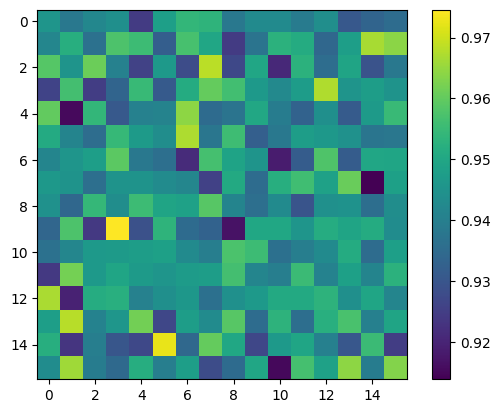

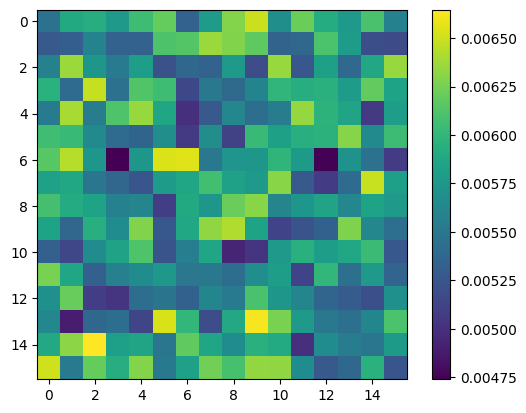

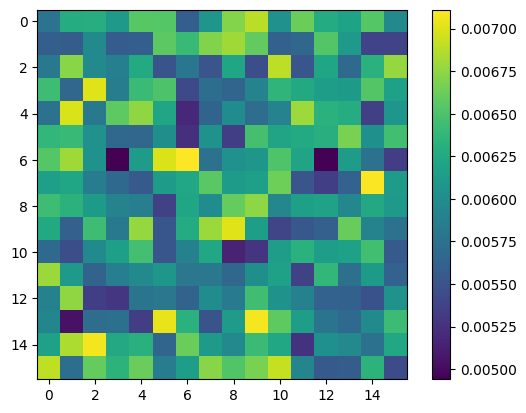

60297
5342.09693554532 4687.724049632859


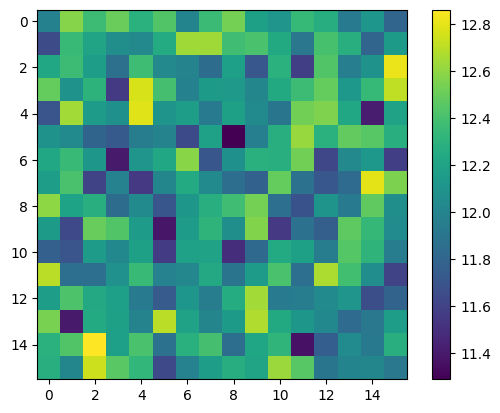

0.9745758495447535 0.9139094814004013


In [6]:
results = sim.get_results()

import matplotlib.pyplot as plt
plt.imshow(results.observables["Density_Distribution"]["mean"]["value"].reshape(L,L))
plt.colorbar()
plt.show()
plt.imshow(results.observables["Density_Distribution"]["mean"]["error"].reshape(L,L))
plt.colorbar()
plt.show()
plt.imshow(results.observables["Density_Distribution"]["mean"]["error"].reshape(L,L)/results.observables["Density_Distribution"]["mean"]["value"].reshape(L,L))
plt.colorbar()
plt.show()
print(results.observables["Density_Distribution"]["count"])

plt.imshow(results.observables["Density_Distribution"]["tau"].reshape(L,L))

rel_count = results.observables["Density_Distribution"]["count"]/results.observables["Density_Distribution"]["tau"]
# print min and max of rel_count without nan
print(np.nanmax(rel_count),np.nanmin(rel_count))

plt.colorbar()
plt.show()

# plt.imshow(results.observables["DensDens_CorrFun_local"]["mean"]["value"].reshape(L,L))
# plt.colorbar()
# plt.show()

# density distribution max and min
print(np.max(results.observables["Density_Distribution"]["mean"]["value"]),np.min(results.observables["Density_Distribution"]["mean"]["value"]))

In [8]:
results.observables.keys()

dict_keys(['DensDens_CorrFun', 'DensDens_CorrFun_local', 'Density_Distribution', 'Density_Matrix', 'Kinetic_Energy', 'Number_of_particles', 'Number_of_particles_squared', 'Potential_Energy', 'Total_Energy', 'Winding_number_squared'])

In [16]:
results.observables["Number_of_particles_squared"]

{'count': 104726,
 'mean': {'value': 13886.925558123103, 'error': 7.387552808763039},
 'error_bins': array([1.08599579, 1.5294158 , 2.14928465, 3.00268759, 4.14991116,
        5.61676154, 7.38755281]),
 'tau': 22.637419145250778}

# Test Uniform

In [29]:
from worm.helpers.sim import WormInputParameters, WormSimulation
import numpy as np
from pathlib import Path

L = 12

muU = 1.0
U_on = 4 / 0.1

mu = (muU*U_on)
V_nn = U_on/4
t_hop = 1.0

print(mu/U_on,4*V_nn/U_on,4/U_on)


p = WormInputParameters(Lx=L,Ly=L,Nmeasure2=100,t_hop=t_hop,U_on=U_on,V_nn=V_nn,thermalization=10000,mu=mu,sweeps=1000000)

save_dir=Path("/Users/fabian/paper/worm/runs/test_uniform")
import shutil

shutil.rmtree(save_dir,ignore_errors=True)
sim = WormSimulation(p,njobs=10,worm_executable="/Users/fabian/paper/worm/build_uniform/qmc_worm_mpi",save_dir=save_dir)

sim.save_parameters()
sim.run()

1.0 1.0 0.1
# Simulation of the Bose-Hubbard or the XXZ model with the worm algorithm

# Copyright (C) 2021  Jonas Greitemann, Nicolas Sadoune and Lode Pollet
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Initializing parameters...
# Constructing worm on rank 1
# Constructing worm on rank 2
# Constructing worm on rank 0
# Constructing worm on rank 4
# Constructing worm on rank 3
# Constructing worm on rank 5
#

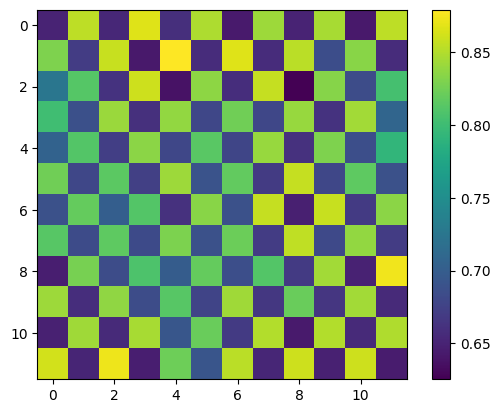

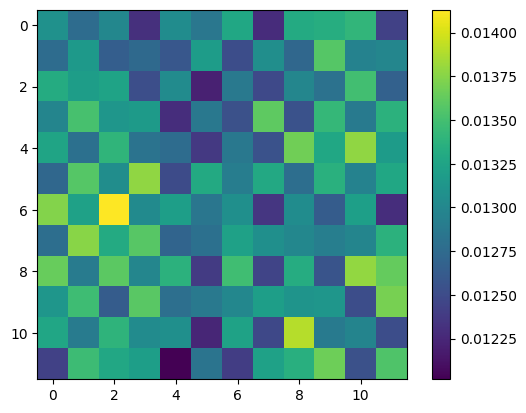

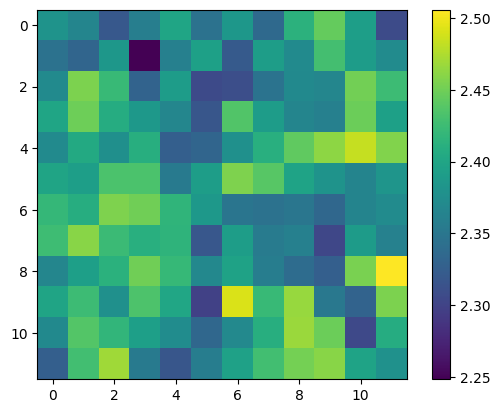

KeyError: 'mean'

In [30]:
results = sim.get_results()

import matplotlib.pyplot as plt
plt.imshow(results.observables["Density_Distribution"]["mean"]["value"].reshape(L,L))
plt.colorbar()
plt.show()
plt.imshow(results.observables["Density_Distribution"]["mean"]["error"].reshape(L,L))
plt.colorbar()
plt.show()

plt.imshow(results.observables["Density_Distribution"]["tau"].reshape(L,L))
plt.colorbar()
plt.show()

plt.imshow(results.observables["DensDens_CorrFun_local"]["mean"]["value"].reshape(L,L))
plt.colorbar()
plt.show()

# density distribution max and min
print(np.max(results.observables["Density_Distribution"]["mean"]["value"]),np.min(results.observables["Density_Distribution"]["mean"]["value"]))